# Notes
I am not too sure who did this but I felt that it is quite unncessary. Apart from being inconclusive, it is unrelated to GDP and education. I would probably delete this notebook.


In [33]:
#Required imports for the project
import requests # for api requests
import pandas as pd #tabular data



In [34]:
api_key = ""

In [35]:
#creating a dataframe function
def json_to_dataframe(response):
    return pd.DataFrame(response.json()[1:], columns=response.json()[0])
# 

In [36]:
#Setting up the API Query parameters for the 
params1 = {"NAICS2017" : 61}


In [37]:
#Requesting the json file from the census website using the api key
url = "https://api.census.gov/data/2017/ecnbasic?get=NAICS2017_LABEL,NAICS2017,GEO_ID,FIRM&for=county:*&key={}".format(api_key)
response = requests.request("GET", url, params=params1)


In [38]:
response.text[0:77]

'[["NAICS2017_LABEL","NAICS2017","GEO_ID","FIRM","NAICS2017","state","county"]'

In [39]:
#Converting ecn data frame into pandas data frame
educational_services = json_to_dataframe(response)
df = pd.DataFrame(data = educational_services)
df['FIRM'] = df['FIRM'].astype(int)
df['state'] = df['state'].astype("string")
df_california1 = df[df['state'] == '06']

In [40]:
# Top 5 counties with largest number of educational services
df_c_sort = df_california1\
.sort_values(by=['FIRM'], ascending=False)\
.head(10)
print('Top 10 counties with the most amount of educational services in California')
df_c_sort

Top 10 counties with the most amount of educational services in California


,NAICS2017_LABEL,NAICS2017,GEO_ID,FIRM,NAICS2017,state,county
298,Educational services,61,0500000US06037,2787,61,06,037
314,Educational services,61,0500000US06059,1187,61,06,059
329,Educational services,61,0500000US06073,1010,61,06,073
301,Educational services,61,0500000US06085,822,61,06,085
209,Educational services,61,0500000US06001,693,61,06,001
214,Educational services,61,0500000US06075,470,61,06,075
210,Educational services,61,0500000US06067,334,61,06,067
318,Educational services,61,0500000US06081,323,61,06,081
299,Educational services,61,0500000US06065,313,61,06,065
203,Educational services,61,0500000US06013,295,61,06,013


In [41]:
#Setting the params
params2 = {"state" : "06"}

In [42]:
df

,NAICS2017_LABEL,NAICS2017,GEO_ID,FIRM,NAICS2017,state,county
0,Educational services,61,0500000US47177,5,61,47,177
1,Educational services,61,0500000US47179,0,61,47,179
2,Educational services,61,0500000US47183,0,61,47,183
3,Educational services,61,0500000US47005,0,61,47,005
4,Educational services,61,0500000US47119,0,61,47,119
...,...,...,...,...,...,...,...
1454,Educational services,61,0500000US27059,4,61,27,059
1455,Educational services,61,0500000US27099,6,61,27,099
1456,Educational services,61,0500000US27105,3,61,27,105
1457,Educational services,61,0500000US27115,5,61,27,115


In [43]:
#Getting the ACS data
#Requesting the json file from the census website using the api key 
url = "https://api.census.gov/data/2017/acs/acs1/profile?get=DP02_0064PE,DP02_0088PE,DP02_0123PE&for=county&key={}".format(api_key)
response2 = requests.request("GET", url)


In [44]:
#Seeing what the columns for the data are
response2.text[0:61]
#Meaning of variables
#DP02_0064PE = Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree
#DP02_0088PE = Percent!!PLACE OF BIRTH!!Total population!!Native!!Born in United States 
#DP02_0123PE = Percent!!ANCESTRY!!Total population!!American

'[["DP02_0064PE","DP02_0088PE","DP02_0123PE","state","county"]'

In [45]:
pop_chars = json_to_dataframe(response2)
df = pd.DataFrame(data = pop_chars)
df_california2 = df[df['state'] == '06']

In [46]:
#Merging the two datasets
merged_census = pd.merge(df_california1, df_california2, on='county')
merged_census.head()

,NAICS2017_LABEL,NAICS2017,GEO_ID,FIRM,NAICS2017,state_x,county,DP02_0064PE,DP02_0088PE,DP02_0123PE,state_y
0,Educational services,61,0500000US06047,13,61,06,047,8.7,74.4,1.7,06
1,Educational services,61,0500000US06033,8,61,06,033,9.5,91.8,2.3,06
2,Educational services,61,0500000US06115,0,61,06,115,13.9,85.4,2.1,06
3,Educational services,61,0500000US06013,295,61,06,013,26.7,72.9,2.7,06
4,Educational services,61,0500000US06099,71,61,06,099,12.0,77.3,3.0,06


In [47]:
merged_census


,NAICS2017_LABEL,NAICS2017,GEO_ID,FIRM,NAICS2017,state_x,county,DP02_0064PE,DP02_0088PE,DP02_0123PE,state_y
0,Educational services,61,0500000US06047,13,61,06,047,8.7,74.4,1.7,06
1,Educational services,61,0500000US06033,8,61,06,033,9.5,91.8,2.3,06
2,Educational services,61,0500000US06115,0,61,06,115,13.9,85.4,2.1,06
3,Educational services,61,0500000US06013,295,61,06,013,26.7,72.9,2.7,06
4,Educational services,61,0500000US06099,71,61,06,099,12.0,77.3,3.0,06
5,Educational services,61,0500000US06083,137,61,06,083,21.2,76.2,1.8,06
6,Educational services,61,0500000US06097,161,61,06,097,22.6,82.0,2.7,06
7,Educational services,61,0500000US06025,5,61,06,025,10.4,66.1,-999999999.0,06
8,Educational services,61,0500000US06001,693,61,06,001,26.9,65.1,2.1,06
9,Educational services,61,0500000US06067,334,61,06,067,20.0,77.2,2.5,06


In [48]:
merged_census.shape


(40, 11)

In [49]:
merged_census.rename(columns={'DP02_0064PE': 'pct of over 25s with Bachelors'}, inplace=True)


In [50]:
merged_census

,NAICS2017_LABEL,NAICS2017,GEO_ID,FIRM,NAICS2017,state_x,county,pct of over 25s with Bachelors,DP02_0088PE,DP02_0123PE,state_y
0,Educational services,61,0500000US06047,13,61,06,047,8.7,74.4,1.7,06
1,Educational services,61,0500000US06033,8,61,06,033,9.5,91.8,2.3,06
2,Educational services,61,0500000US06115,0,61,06,115,13.9,85.4,2.1,06
3,Educational services,61,0500000US06013,295,61,06,013,26.7,72.9,2.7,06
4,Educational services,61,0500000US06099,71,61,06,099,12.0,77.3,3.0,06
5,Educational services,61,0500000US06083,137,61,06,083,21.2,76.2,1.8,06
6,Educational services,61,0500000US06097,161,61,06,097,22.6,82.0,2.7,06
7,Educational services,61,0500000US06025,5,61,06,025,10.4,66.1,-999999999.0,06
8,Educational services,61,0500000US06001,693,61,06,001,26.9,65.1,2.1,06
9,Educational services,61,0500000US06067,334,61,06,067,20.0,77.2,2.5,06


In [51]:
merged_census.rename(columns={'DP02_0088PE': 'pct born in US'}, inplace=True)

In [52]:
merged_census

,NAICS2017_LABEL,NAICS2017,GEO_ID,FIRM,NAICS2017,state_x,county,pct of over 25s with Bachelors,pct born in US,DP02_0123PE,state_y
0,Educational services,61,0500000US06047,13,61,06,047,8.7,74.4,1.7,06
1,Educational services,61,0500000US06033,8,61,06,033,9.5,91.8,2.3,06
2,Educational services,61,0500000US06115,0,61,06,115,13.9,85.4,2.1,06
3,Educational services,61,0500000US06013,295,61,06,013,26.7,72.9,2.7,06
4,Educational services,61,0500000US06099,71,61,06,099,12.0,77.3,3.0,06
5,Educational services,61,0500000US06083,137,61,06,083,21.2,76.2,1.8,06
6,Educational services,61,0500000US06097,161,61,06,097,22.6,82.0,2.7,06
7,Educational services,61,0500000US06025,5,61,06,025,10.4,66.1,-999999999.0,06
8,Educational services,61,0500000US06001,693,61,06,001,26.9,65.1,2.1,06
9,Educational services,61,0500000US06067,334,61,06,067,20.0,77.2,2.5,06


In [53]:
merged_census

,NAICS2017_LABEL,NAICS2017,GEO_ID,FIRM,NAICS2017,state_x,county,pct of over 25s with Bachelors,pct born in US,DP02_0123PE,state_y
0,Educational services,61,0500000US06047,13,61,06,047,8.7,74.4,1.7,06
1,Educational services,61,0500000US06033,8,61,06,033,9.5,91.8,2.3,06
2,Educational services,61,0500000US06115,0,61,06,115,13.9,85.4,2.1,06
3,Educational services,61,0500000US06013,295,61,06,013,26.7,72.9,2.7,06
4,Educational services,61,0500000US06099,71,61,06,099,12.0,77.3,3.0,06
5,Educational services,61,0500000US06083,137,61,06,083,21.2,76.2,1.8,06
6,Educational services,61,0500000US06097,161,61,06,097,22.6,82.0,2.7,06
7,Educational services,61,0500000US06025,5,61,06,025,10.4,66.1,-999999999.0,06
8,Educational services,61,0500000US06001,693,61,06,001,26.9,65.1,2.1,06
9,Educational services,61,0500000US06067,334,61,06,067,20.0,77.2,2.5,06


In [54]:
merged_census

,NAICS2017_LABEL,NAICS2017,GEO_ID,FIRM,NAICS2017,state_x,county,pct of over 25s with Bachelors,pct born in US,DP02_0123PE,state_y
0,Educational services,61,0500000US06047,13,61,06,047,8.7,74.4,1.7,06
1,Educational services,61,0500000US06033,8,61,06,033,9.5,91.8,2.3,06
2,Educational services,61,0500000US06115,0,61,06,115,13.9,85.4,2.1,06
3,Educational services,61,0500000US06013,295,61,06,013,26.7,72.9,2.7,06
4,Educational services,61,0500000US06099,71,61,06,099,12.0,77.3,3.0,06
5,Educational services,61,0500000US06083,137,61,06,083,21.2,76.2,1.8,06
6,Educational services,61,0500000US06097,161,61,06,097,22.6,82.0,2.7,06
7,Educational services,61,0500000US06025,5,61,06,025,10.4,66.1,-999999999.0,06
8,Educational services,61,0500000US06001,693,61,06,001,26.9,65.1,2.1,06
9,Educational services,61,0500000US06067,334,61,06,067,20.0,77.2,2.5,06


In [55]:
merged_census2 = merged_census[['GEO_ID', 'FIRM', 'county','pct of over 25s with Bachelors', 'pct born in US']]

In [56]:
merged_census2


,GEO_ID,FIRM,county,pct of over 25s with Bachelors,pct born in US
0,0500000US06047,13,047,8.7,74.4
1,0500000US06033,8,033,9.5,91.8
2,0500000US06115,0,115,13.9,85.4
3,0500000US06013,295,013,26.7,72.9
4,0500000US06099,71,099,12.0,77.3
5,0500000US06083,137,083,21.2,76.2
6,0500000US06097,161,097,22.6,82.0
7,0500000US06025,5,025,10.4,66.1
8,0500000US06001,693,001,26.9,65.1
9,0500000US06067,334,067,20.0,77.2


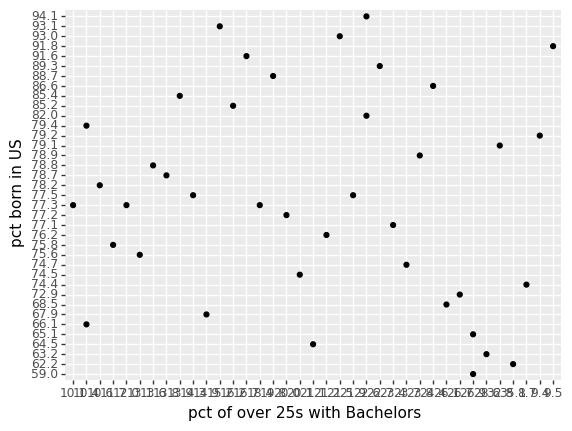

<ggplot: (8775872424780)>

In [57]:
from plotnine import *


# Create scatterplot with % over 25 w/ Bachelors on x-axis and % population who are native on y-axis
ggplot(merged_census2, aes(x ='pct of over 25s with Bachelors', y ='pct born in US')) + \
    geom_point()


In [58]:
merged_census2.dtypes

GEO_ID                            object
FIRM                               int64
county                            object
pct of over 25s with Bachelors    object
pct born in US                    object
dtype: object

/var/folders/19/pptcsj1d2d97pbcfphs_4bl00000gn/T/ipykernel_12612/2831162685.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/19/pptcsj1d2d97pbcfphs_4bl00000gn/T/ipykernel_12612/2831162685.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


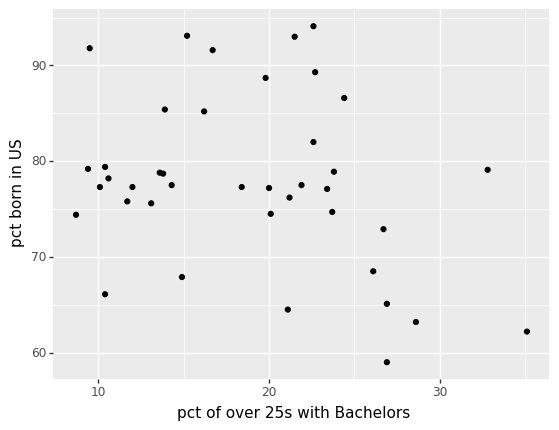

<ggplot: (8775894765960)>

In [59]:
import pandas as pd
from plotnine import *


# convert 'x' to a numeric data type
merged_census2['pct of over 25s with Bachelors'] = merged_census2['pct of over 25s with Bachelors'].astype(float)
merged_census2['pct born in US'] = merged_census2['pct born in US'].astype(float)


# create scatterplot with continuous scale
plot3 = (ggplot(merged_census2, aes(x='pct of over 25s with Bachelors', y='pct born in US')) +
 geom_point())
         
plot3


/var/folders/19/pptcsj1d2d97pbcfphs_4bl00000gn/T/ipykernel_12612/4210862634.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/19/pptcsj1d2d97pbcfphs_4bl00000gn/T/ipykernel_12612/4210862634.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


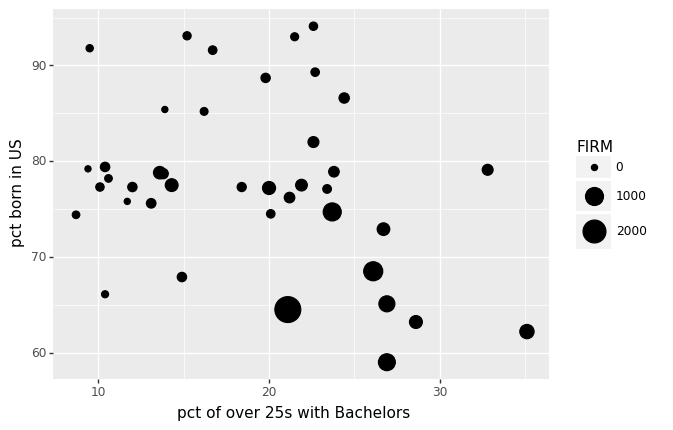

<ggplot: (8775861007767)>

In [60]:
import pandas as pd
from plotnine import *

# convert 'x' to a numeric data type
merged_census2['pct of over 25s with Bachelors'] = merged_census2['pct of over 25s with Bachelors'].astype(float)
merged_census2['pct born in US'] = merged_census2['pct born in US'].astype(float)

# create scatterplot with continuous scale and varying dot sizes based on 'FIRM'
plot3 = (ggplot(merged_census2, aes(x='pct of over 25s with Bachelors', y='pct born in US', size='FIRM')) +
         geom_point() +
         scale_size_continuous(range=(2, 10)))

plot3


/var/folders/19/pptcsj1d2d97pbcfphs_4bl00000gn/T/ipykernel_12612/4074945516.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/19/pptcsj1d2d97pbcfphs_4bl00000gn/T/ipykernel_12612/4074945516.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/albertomartino/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:36: PlotnineWarning: Scale for 'color' is already present.
Adding another scale for 'color',
which will replace the existing scale.



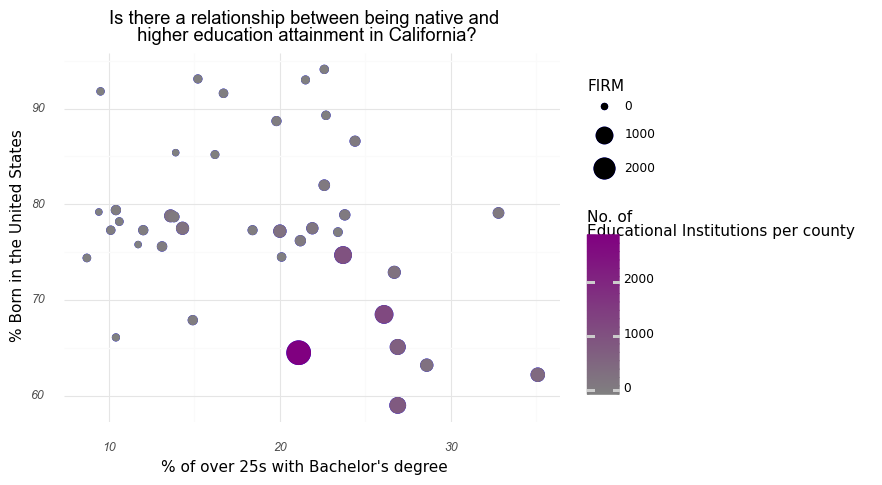

<ggplot: (8775861084154)>

In [62]:
import pandas as pd
from plotnine import *

# convert 'x' to a numeric data type
merged_census2['pct of over 25s with Bachelors'] = merged_census2['pct of over 25s with Bachelors'].astype(float)
merged_census2['pct born in US'] = merged_census2['pct born in US'].astype(float)

# create scatterplot with continuous scale and varying dot sizes based on 'FIRM'
plot3 = (ggplot(merged_census2, aes(x = 'pct of over 25s with Bachelors', y = 'pct born in US', size = 'FIRM')) +
         geom_point(color = 'blue') +
         scale_size_continuous(range = (2, 9)) +
         scale_color_manual(values = ['blue']) +
         theme(axis_text = element_text(family = "Arial",color='black', ))) + scale_color_gradient(limits=(0, 1))

plot3 = plot3 + labs(x="% of over 25s with Bachelor's degree", y='% Born in the United States') + theme(axis_text_x=element_text(family="Arial"))
plot3 = plot3 +  geom_point(aes(color='FIRM')) + \
    scale_color_gradient(low='grey', high='purple') 
plot3 + theme_minimal() + labs(color='No. of \nEducational Institutions per county') + theme(axis_text=element_text(style='italic', family = "Arial")) + \
        ggtitle("Does being born in the US have an influence on and\n higher education attainment in California?") +\
theme(plot_title=element_text(family="Arial")) +  theme(legend_position="right")